In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

In [2]:
wn.simplefilter('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\DAPP_Aug2023\DATA\application_record.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


* days_birth = counting backwards from current day (0), basically -1 means yesterday
* days_employed = counting backwards from current day (0), basically -1 means someone got employment yesterday. +ve means person is currently unemployed. so +1 means he/she lost job yesterday

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

<Axes: xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

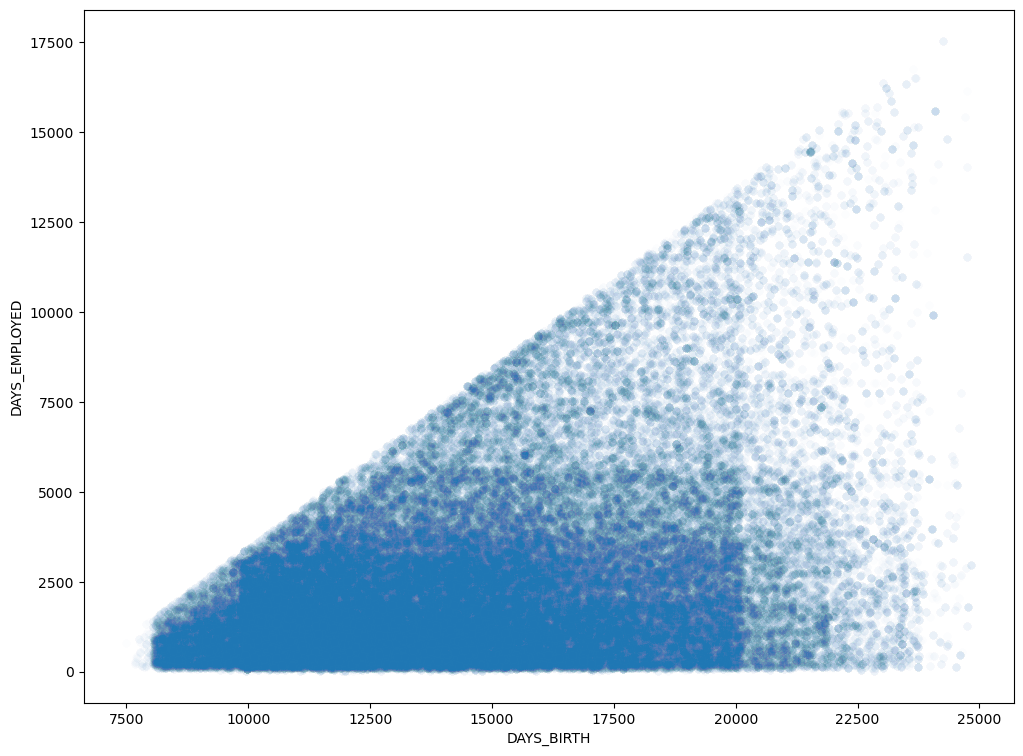

In [16]:
#scatterplot showing relationship between days employed vs age of the person who are employed
#tip: remove unemployed people first
plt.figure(figsize=(12,9))
emp_ppl = df[df['DAYS_EMPLOYED']<0]
emp_ppl = df[df['DAYS_EMPLOYED']<0]

emp_ppl['DAYS_EMPLOYED'] = -1*emp_ppl['DAYS_EMPLOYED']
emp_ppl['DAYS_BIRTH']= -1*emp_ppl['DAYS_BIRTH']


sns.scatterplot(x='DAYS_BIRTH',y='DAYS_EMPLOYED', data=emp_ppl, alpha=0.01)

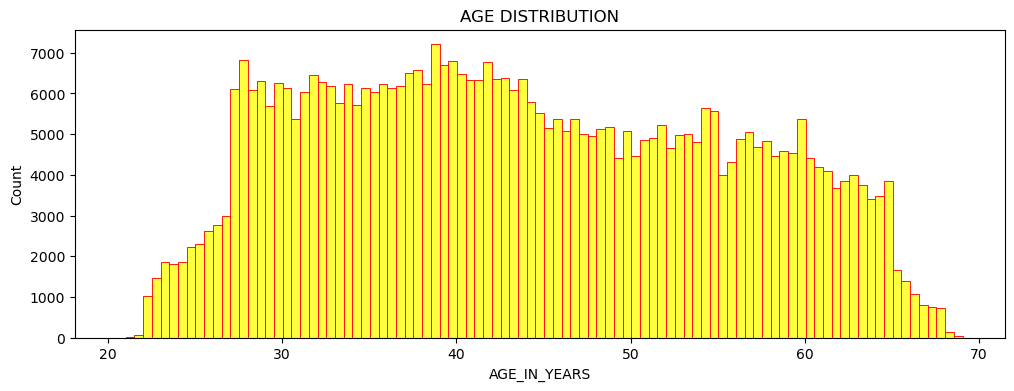

In [20]:
#histogram showing age of people in years
plt.figure(figsize=(12,4))
df['AGE_IN_YEARS'] = -1*df['DAYS_BIRTH']/365
sns.histplot(x='AGE_IN_YEARS',data=df, lw=4, edgecolor='red', color='yellow')
plt.title('AGE DISTRIBUTION')
plt.show()

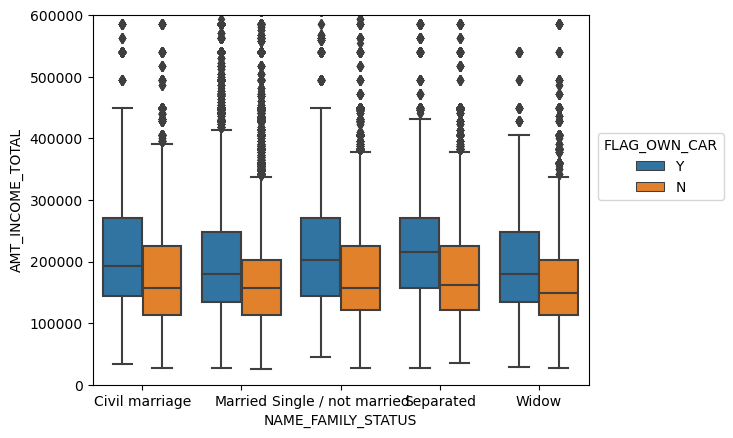

In [31]:
#boxplot for each category of 'NAME_FAMILY_STATUS' that displays their total income. Hue = 'FLAG_OWN_CAR'
sns.boxplot(x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',data=df,hue='FLAG_OWN_CAR')
plt.ylim(0,600000)
plt.legend(loc=(1.02,0.5), title='FLAG_OWN_CAR')

In [36]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_IN_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32.890411
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32.890411
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58.832877
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.356164


In [37]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE_IN_YEARS'],
      dtype='object')

<Axes: >

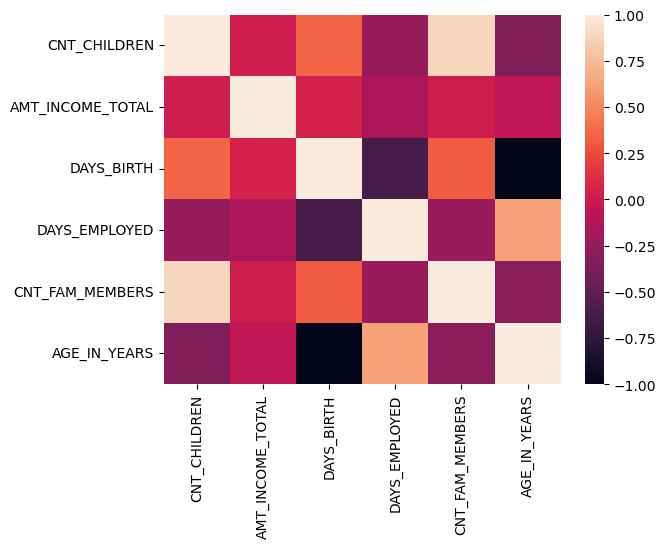

In [39]:
#calculate correlation b/w all the columns. remove FLAG_MOBIL column because of high number of NaN
sns.heatmap(df[['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AGE_IN_YEARS']].corr())